## Curso - Data Visualization With Python - IBM Cognitive Class

#### Formação: Applied Data Science With Python

#### Victor Hugo Negrisoli - Desenvolvedor de Software Full-Stack & Analista de Dados¶

#### Módulo 1 - Introdução a ferramentas de visualização de dados em Python

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [18]:
# Criando um gráfico de histograma utilizando a camada de Artista da Matplotlib
# Na camada de artista, define-se o Canvas que será gerado e várias de suas configurações

fig = Figure()
canvas = FigureCanvas(fig)

x = np.random.randn(10000)
ax = fig.add_subplot(111)
ax.hist(x, 100)
ax.set_title("Distribuição Normal com $\mu=0, \sigma=1$ - Artist Layer")
fig.savefig("imagens/modulo_1/Teste Histograma - Artist Layer.png")

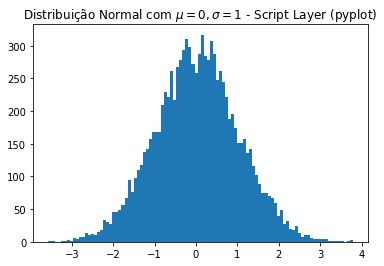

In [19]:
# Criando um gráfico de histograma utilizando a camada de Script da Matplotlib

plt.hist(x, 100)
plt.title("Distribuição Normal com $\mu=0, \sigma=1$ - Script Layer (pyplot)")
plt.savefig("imagens/modulo_1/Teste Histograma - Script Layer.png")
plt.show()